In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.utils import resample
import joblib

In [2]:
df=pd.read_csv("../creditcard.csv")

In [3]:
legit = df[df.Class == 0]
fraud = df[df.Class == 1]
legit_sample = resample(legit,replace=False,n_samples=len(fraud),random_state=42)
df1 = pd.concat([legit_sample, fraud], axis=0)
x = df1.drop(columns='Class', axis=1)
y = df1['Class']

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=5)
(x_train.shape, y_train.shape),(x_test.shape, y_test.shape)

(((738, 30), (738,)), ((246, 30), (246,)))

In [5]:
model = lgb.LGBMClassifier(random_state=42)

In [6]:
model.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 362, number of negative: 376
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001461 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7385
[LightGBM] [Info] Number of data points in the train set: 738, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.490515 -> initscore=-0.037945
[LightGBM] [Info] Start training from score -0.037945
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

LGBMClassifier(random_state=42)

In [7]:
filename = 'lightgbm_downsampling_model.joblib'
joblib.dump(model, filename)

['lightgbm_downsampling_model.joblib']

In [8]:
y_train_pred=model.predict(x_train)
training_data_accuracy = accuracy_score(y_train_pred, y_train)

print('Accuracy on Training data :', training_data_accuracy)

Accuracy on Training data : 1.0


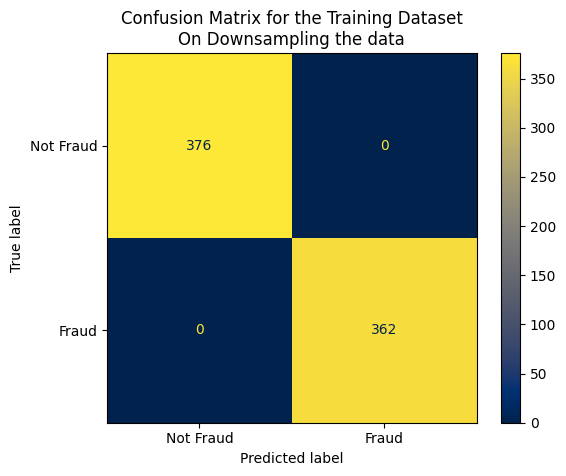

In [9]:
cm = confusion_matrix(y_train, y_train_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Not Fraud', 'Fraud'])
disp.plot(cmap='cividis')
plt.title('Confusion Matrix for the Training Dataset\nOn Downsampling the data')
plt.show();

In [10]:
y_test_pred = model.predict(x_test)
pd.value_counts(y_test_pred)

1    126
0    120
Name: count, dtype: int64

In [11]:
testing_data_accuracy = accuracy_score(y_test_pred, y_test)
print('Accuracy score on Test Data :', testing_data_accuracy)

Accuracy score on Test Data : 0.967479674796748


In [12]:
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       116
           1       0.98      0.95      0.97       130

    accuracy                           0.97       246
   macro avg       0.97      0.97      0.97       246
weighted avg       0.97      0.97      0.97       246



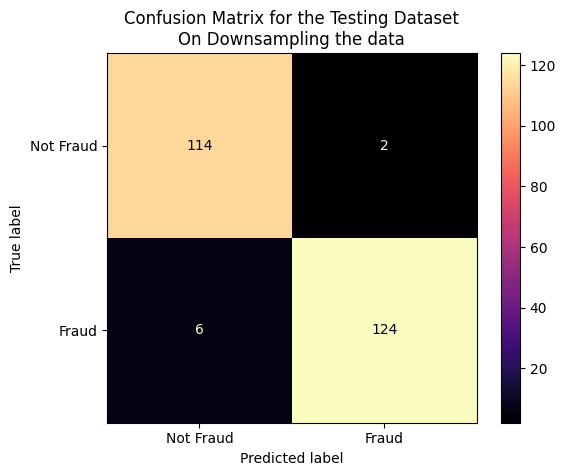

In [13]:
cm = confusion_matrix(y_test, y_test_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Not Fraud', 'Fraud'])
disp.plot(cmap='magma')
plt.title('Confusion Matrix for the Testing Dataset\nOn Downsampling the data')
plt.show();

In [14]:
# Get all parameters and their values
params = model.get_params()

# Print all parameters and their values
for param, value in params.items():
    print(f"{param}: {value}")


boosting_type: gbdt
class_weight: None
colsample_bytree: 1.0
importance_type: split
learning_rate: 0.1
max_depth: -1
min_child_samples: 20
min_child_weight: 0.001
min_split_gain: 0.0
n_estimators: 100
n_jobs: None
num_leaves: 31
objective: None
random_state: 42
reg_alpha: 0.0
reg_lambda: 0.0
subsample: 1.0
subsample_for_bin: 200000
subsample_freq: 0


In [15]:
# Upsampling
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0]

fraud = resample(fraud, replace=True, n_samples=len(non_fraud), random_state=42)

In [16]:
df2=pd.concat([fraud,non_fraud])
x = df2.drop(['Time', 'Class'], axis=1)
y = df2['Class']

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [18]:
model = lgb.LGBMClassifier(random_state=42)

In [19]:
model.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 227569, number of negative: 227335
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.028156 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7394
[LightGBM] [Info] Number of data points in the train set: 454904, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500257 -> initscore=0.001029
[LightGBM] [Info] Start training from score 0.001029


LGBMClassifier(random_state=42)

In [20]:
filename = 'lightgbm_upsampling_model.joblib'
joblib.dump(model, filename)

['lightgbm_upsampling_model.joblib']

In [21]:
y_train_pred=model.predict(x_train)

In [22]:
print("Accuracy on Training Data : ",accuracy_score(y_train,y_train_pred))
print("\nClassification Report :\n", classification_report(y_train, y_train_pred))


Accuracy on Training Data :  0.999951638147829

Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227335
           1       1.00      1.00      1.00    227569

    accuracy                           1.00    454904
   macro avg       1.00      1.00      1.00    454904
weighted avg       1.00      1.00      1.00    454904



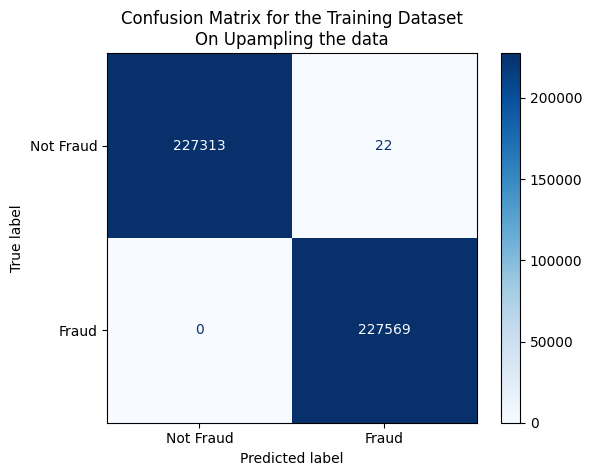

In [23]:
cm = confusion_matrix(y_train, y_train_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Not Fraud', 'Fraud'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for the Training Dataset\nOn Upampling the data')
plt.show();

In [24]:
y_test_pred=model.predict(x_test)

In [25]:
print("Accuracy on Testing Data : ",accuracy_score(y_test,y_test_pred))
print("\nClassification Report :\n", classification_report(y_test, y_test_pred))

Accuracy on Testing Data :  0.999806552591316

Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56980
           1       1.00      1.00      1.00     56746

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



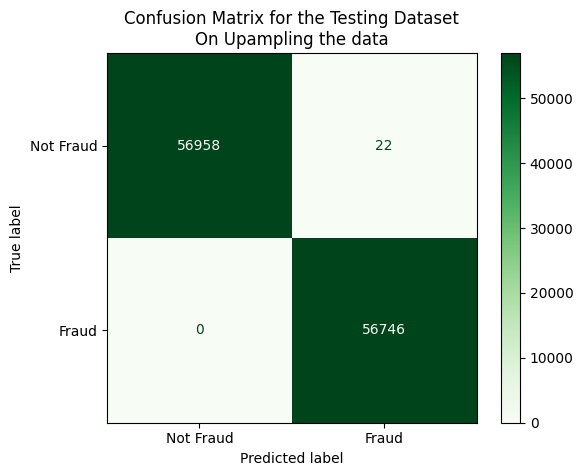

In [26]:
cm = confusion_matrix(y_test, y_test_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Not Fraud', 'Fraud'])
disp.plot(cmap='Greens')
plt.title('Confusion Matrix for the Testing Dataset\nOn Upampling the data')
plt.show();